In [1]:
#Set up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_table("task5_train_user_wlabel.tsv")

In [3]:
print(data.shape)

(10051, 3)


In [4]:
data.head(3)

,tweet_id,tweet_text,label
0,103856,Un estudio demuestra que los niños pueden ser ...,Lit-News_mentions
1,102562,Los pacientes y contactos asintomáticos pueden...,Lit-News_mentions
2,104842,Establecen en Gaceta Oficial baremos de costos...,Lit-News_mentions


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    10051 non-null  int64 
 1   tweet_text  10051 non-null  object
 2   label       10051 non-null  object
dtypes: int64(1), object(2)
memory usage: 235.7+ KB


In [7]:
data['label'].unique()

array(['Lit-News_mentions', 'non-personal_reports', 'Self_reports'],
      dtype=object)

In [8]:
data[data['label'] == 'Lit-News_mentions']['tweet_text'][0]

'Un estudio demuestra que los niños pueden ser "portadores ocultos" del coronavirus https://t.co/T1zqOgMY56'

In [9]:
data[data['label'] == 'Self_reports']['tweet_text'][6]

'Anoche descubrí que el coronavirus sí que me ha quitado un poquito de olfato.En mi casa celebramos el día de la madre ayer porque antes no se pudo, mi regalo lo habían perfumado al comprarlo y toda la familia decía que olía muy bien ._. yo no olí nada hasta pasado un buen rato.'

In [10]:
data[data['label'] == 'non-personal_reports']['tweet_text'][5]

'El coronavirus me enseño lo malagradecida que fui tantos años con mi familia, en especial con mi madre y no saben cuanto voy a cambiar y trabajar para darle una vida tan buena como me la dio a mi.'

In [11]:
data['label'].value_counts()

Lit-News_mentions       5984
non-personal_reports    2413
Self_reports            1654
Name: label, dtype: int64

<AxesSubplot:title={'center':'Number of Tweets by Category'}, xlabel='label'>

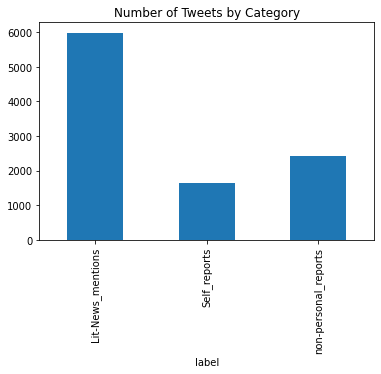

In [12]:
data.groupby('label').tweet_text.count().plot.bar(title='Number of Tweets by Category')

In [13]:
X = data[['tweet_id', 'tweet_text']]
y = data.loc[:, ['label']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .8)

In [15]:
X_train

,tweet_id,tweet_text
7495,102716,Los síntomas de la COVID-19 pueden variar de l...
5777,201289,"Dolor de garganta y de todo el cuerpo, toca ir..."
4234,301102,"""Mi mujer ha dado positivo y ha tenido fiebre ..."
6940,105895,Destaca que algunos de los datos que se contie...
7205,201322,No he tenido tiempo de tuitear pero me di un c...
...,...,...
9225,102976,REALISMO Y SALUD (COVID-19)Webmaster: Víctor L...
4859,200226,"Me acaban de notificar que tengo COVID-19 , me..."
3264,200844,Ahora con dolor de cabeza me pueden considerar...
9845,100156,Identifica los síntomas de alarma y para solic...


In [16]:
y_train

,label
7495,Lit-News_mentions
5777,Self_reports
4234,non-personal_reports
6940,Lit-News_mentions
7205,Self_reports
...,...
9225,Lit-News_mentions
4859,Self_reports
3264,Self_reports
9845,Lit-News_mentions


In [17]:
X_test

,tweet_id,tweet_text
7990,100460,Esta farmacéutica garantiza la producción de 2...
9703,301908,Dormir con la ventana abierta porque hace calo...
5528,300889,@pdhernandezf @roa_flores Los test de coronavi...
1804,101501,La Universidad de Buenos Aires entrena perros ...
226,105013,Mi amiga Nancy tiene #Coronavirus està aislada...
...,...,...
7863,301284,"Al momento de su secuestro, el diputado @TonyG..."
1868,100251,Finlandia recurre a perros para detectar el Co...
3192,103444,📢 Si presentas algunos de estos síntomas: male...
9815,104896,Si presenta síntomas propios del #Coronavirus ...


In [18]:
y_test

,label
7990,Lit-News_mentions
9703,non-personal_reports
5528,non-personal_reports
1804,Lit-News_mentions
226,Lit-News_mentions
...,...
7863,non-personal_reports
1868,Lit-News_mentions
3192,Lit-News_mentions
9815,Lit-News_mentions


In [19]:
train = pd.concat([X_train, y_train], axis=1)

In [20]:
train.to_csv("train.tsv", sep="\t", index = False)

In [21]:
dev = pd.concat([X_test, y_test], axis=1)

In [22]:
dev.to_csv("dev.tsv", sep="\t", index = False)